In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Superstore.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [10]:
# Preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

df[['Order Date','Ship Date','Delivery Time','Year','Month']]

,Order Date,Ship Date,Delivery Time,Year,Month
0,2016-11-08,2016-11-11,3,2016,11
1,2016-11-08,2016-11-11,3,2016,11
2,2016-06-12,2016-06-16,4,2016,6
3,2015-10-11,2015-10-18,7,2015,10
4,2015-10-11,2015-10-18,7,2015,10
...,...,...,...,...,...
9989,2014-01-21,2014-01-23,2,2014,1
9990,2017-02-26,2017-03-03,5,2017,2
9991,2017-02-26,2017-03-03,5,2017,2
9992,2017-02-26,2017-03-03,5,2017,2


In [13]:
df[['Category','Sub-Category']]

,Category,Sub-Category
0,Furniture,Bookcases
1,Furniture,Chairs
2,Office Supplies,Labels
3,Furniture,Tables
4,Office Supplies,Storage
...,...,...
9989,Furniture,Furnishings
9990,Furniture,Furnishings
9991,Technology,Phones
9992,Office Supplies,Paper


In [11]:
# 1. Profit margins by category and sub-category
category_profit = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
print("1. Profit margins by category and sub-category")
category_profit

1. Profit margins by category and sub-category


,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,114879.9963,-3472.5560
1,Furniture,Chairs,328449.1030,26590.1663
2,Furniture,Furnishings,91705.1640,13059.1436
3,Furniture,Tables,206965.5320,-17725.4811
4,Office Supplies,Appliances,107532.1610,18138.0054
5,Office Supplies,Art,27118.7920,6527.7870
6,Office Supplies,Binders,203412.7330,30221.7633
7,Office Supplies,Envelopes,16476.4020,6964.1767
8,Office Supplies,Fasteners,3024.2800,949.5182
9,Office Supplies,Labels,12486.3120,5546.2540


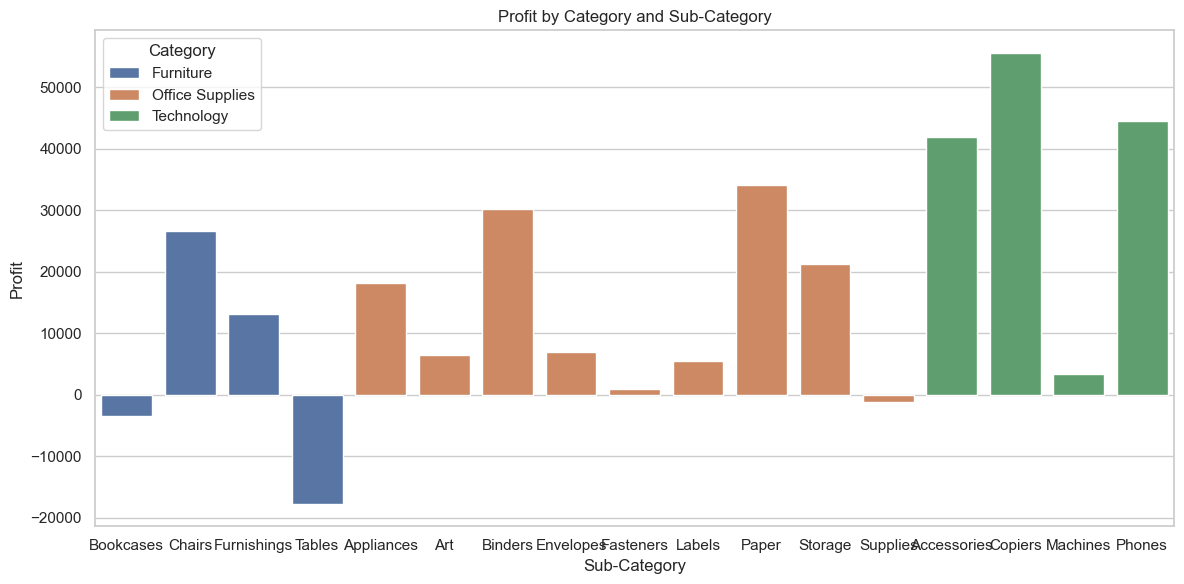

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_profit, x='Sub-Category', y='Profit', hue='Category')
plt.title('Profit by Category and Sub-Category')
plt.tight_layout()
plt.show()

In [34]:
# 2. Sales and profit by state
state_profit = (
    df.groupby(['State'])[['Sales', 'Profit']].sum()
    .reset_index().sort_values(by='Sales', ascending=False).head(10)
)

print("2. Sales and profit by state")
state_profit

2. Sales and profit by state


,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


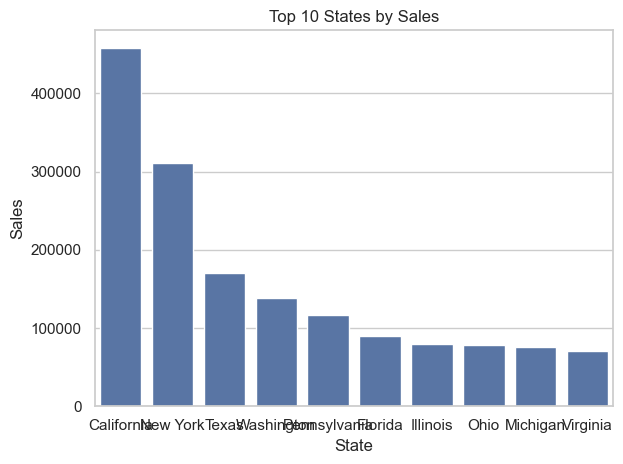

In [36]:
#plt.figure(figsize=(12, 6))
top_states = state_profit.sort_values(by='Sales', ascending=False)
sns.barplot(data=top_states, x='State', y='Sales')
plt.title('Top 10 States by Sales')
plt.tight_layout()
plt.show()

In [46]:
# 3. Discount impact on profit
discount_impact = df.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()
print("3. Average Sales and Profit by Discount")
discount_impact


3. Average Sales and Profit by Discount


,Discount,Sales,Profit
0,0.00,226.742074,66.900292
1,0.10,578.397351,96.055074
2,0.15,529.971567,27.288298
3,0.20,209.076940,24.702572
4,0.30,454.742974,-45.679636
5,0.32,536.794770,-88.560656
6,0.40,565.134874,-111.927429
7,0.45,498.634000,-226.646464
8,0.50,892.705152,-310.703456
9,0.60,48.150000,-43.077212


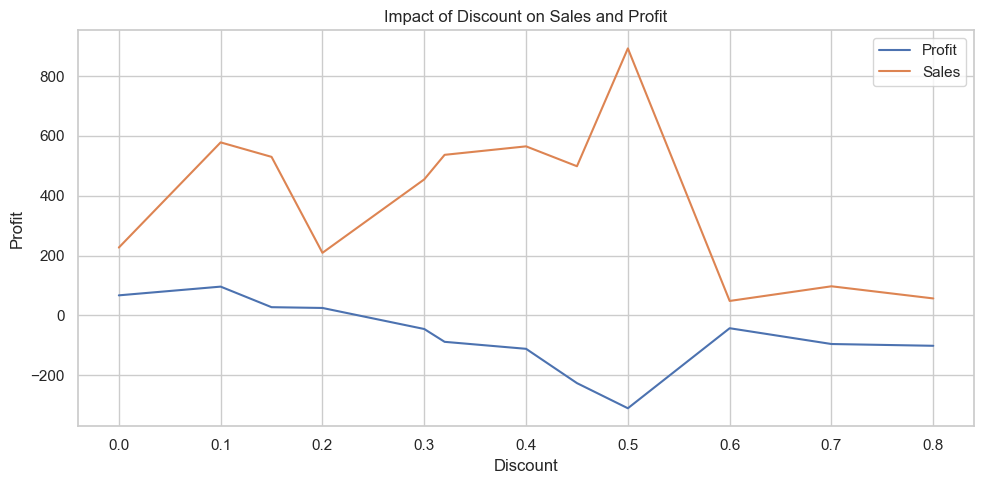

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=discount_impact, x='Discount', y='Profit', label='Profit')
sns.lineplot(data=discount_impact, x='Discount', y='Sales', label='Sales')
plt.title('Impact of Discount on Sales and Profit')
plt.tight_layout()
plt.show()

In [48]:
# 4. Loss-making products
product_loss = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Profit').head(10).reset_index()
print("\n4. Top 10 Loss-Making Products")
product_loss


4. Top 10 Loss-Making Products


,Product Name,Sales,Profit
0,Cubify CubeX 3D Printer Double Head Print,11099.963,-8879.9704
1,Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730
2,Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
3,Chromcraft Bull-Nose Wood Oval Conference Tabl...,9917.640,-2876.1156
4,Bush Advantage Collection Racetrack Conference...,9544.725,-1934.3976
5,GBC DocuBind P400 Electric Binding System,17965.068,-1878.1662
6,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1811.0784
7,Martin Yale Chadless Opener Electric Letter Op...,16656.200,-1299.1836
8,Balt Solid Wood Round Tables,6518.754,-1201.0581
9,BoxOffice By Design Rectangular and Half-Moon ...,1706.250,-1148.4375


In [49]:
# 5. Average delivery time by ship mode
delivery_by_mode = df.groupby('Ship Mode')['Delivery Time'].mean().reset_index()
print("\n5. Average Delivery Time by Shipping Mode")
delivery_by_mode



5. Average Delivery Time by Shipping Mode


,Ship Mode,Delivery Time
0,First Class,2.182705
1,Same Day,0.044199
2,Second Class,3.238046
3,Standard Class,5.006535


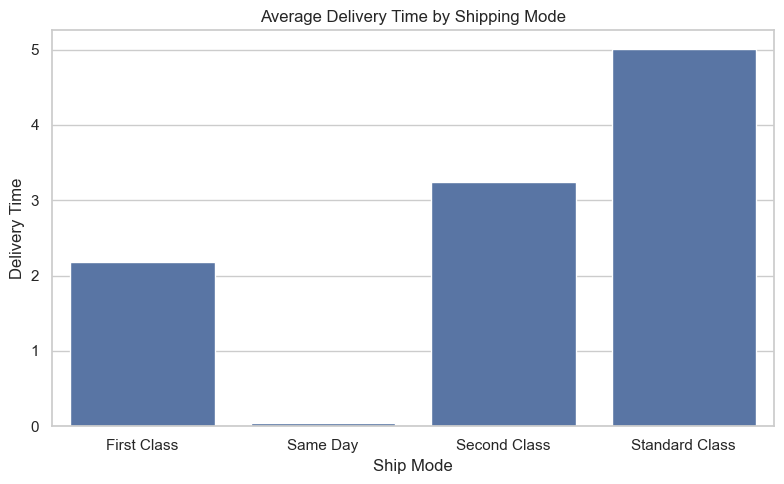

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(data=delivery_by_mode, x='Ship Mode', y='Delivery Time')
plt.title('Average Delivery Time by Shipping Mode')
plt.tight_layout()
plt.show()

In [52]:
# 6. Shipping mode frequency and profitability
ship_mode_profit = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()
print("\n6. Profit by Shipping Mode")
ship_mode_profit



6. Profit by Shipping Mode


,Ship Mode,Sales,Profit
0,First Class,3.514284e+05,48969.8399
1,Same Day,1.283631e+05,15891.7589
2,Second Class,4.591936e+05,57446.6354
3,Standard Class,1.358216e+06,164088.7875


In [53]:
# 7. Shipping performance by region
shipmode_region = df.groupby(['Region', 'Ship Mode'])[['Sales', 'Profit']].sum().reset_index()
print("\n7. Shipping Performance by Region")
shipmode_region



7. Shipping Performance by Region


,Region,Ship Mode,Sales,Profit
0,Central,First Class,58746.9154,3707.2672
1,Central,Same Day,20415.4100,1531.8797
2,Central,Second Class,103550.0054,9114.8349
3,Central,Standard Class,318527.5600,25352.3807
4,East,First Class,113587.0530,15732.0141
5,East,Same Day,43326.8320,7980.2670
6,East,Second Class,116545.5240,10787.2908
7,East,Standard Class,405321.8310,57023.2081
8,South,First Class,49332.5660,6892.3854
9,South,Same Day,21017.1730,-1762.3350


In [54]:
# 8. Average order value by segment
segment_order = df.groupby('Segment').agg({'Sales': 'mean', 'Order ID': 'count'}).reset_index()
print("\n8. Average Order Value by Segment")
segment_order


8. Average Order Value by Segment


,Segment,Sales,Order ID
0,Consumer,223.733644,5191
1,Corporate,233.823300,3020
2,Home Office,240.972041,1783


In [55]:
# 9. Top 10 profitable customers
top_customers = df.groupby(['Customer ID', 'Customer Name'])[['Profit']].sum().sort_values(by='Profit', ascending=False).head(10).reset_index()
print("\n9. Top 10 Profitable Customers")
top_customers



9. Top 10 Profitable Customers


,Customer ID,Customer Name,Profit
0,TC-20980,Tamara Chand,8981.3239
1,RB-19360,Raymond Buch,6976.0959
2,SC-20095,Sanjit Chand,5757.4119
3,HL-15040,Hunter Lopez,5622.4292
4,AB-10105,Adrian Barton,5444.8055
5,TA-21385,Tom Ashbrook,4703.7883
6,CM-12385,Christopher Martinez,3899.8904
7,KD-16495,Keith Dawkins,3038.6254
8,AR-10540,Andy Reiter,2884.6208
9,DR-12940,Daniel Raglin,2869.0760


In [58]:
# 10. Repeat customers and discount/profit
repeat_customers = df.groupby('Customer ID').agg({
    'Order ID': 'nunique',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()
print("\n10. Repeat Customer Behavior")
repeat_customers.head()



10. Repeat Customer Behavior


,Customer ID,Order ID,Discount,Profit
0,AA-10315,5,0.090909,-362.8825
1,AA-10375,9,0.080000,277.3824
2,AA-10480,4,0.016667,435.8274
3,AA-10645,6,0.063889,857.8033
4,AB-10015,3,0.066667,129.3465


In [59]:
# 11. Monthly sales, profit, and discount trends
monthly_trend = df.groupby(['Year', 'Month'])[['Sales', 'Profit', 'Discount']].sum().reset_index()
print("\n11. Monthly Trends in Sales, Profit, and Discount")
monthly_trend.head()



11. Monthly Trends in Sales, Profit, and Discount


,Year,Month,Sales,Profit,Discount
0,2014,1,14236.895,2450.1907,10.00
1,2014,2,4519.892,862.3084,8.10
2,2014,3,55691.009,498.7299,26.30
3,2014,4,28295.345,3488.8352,14.85
4,2014,5,23648.287,2738.7096,18.95


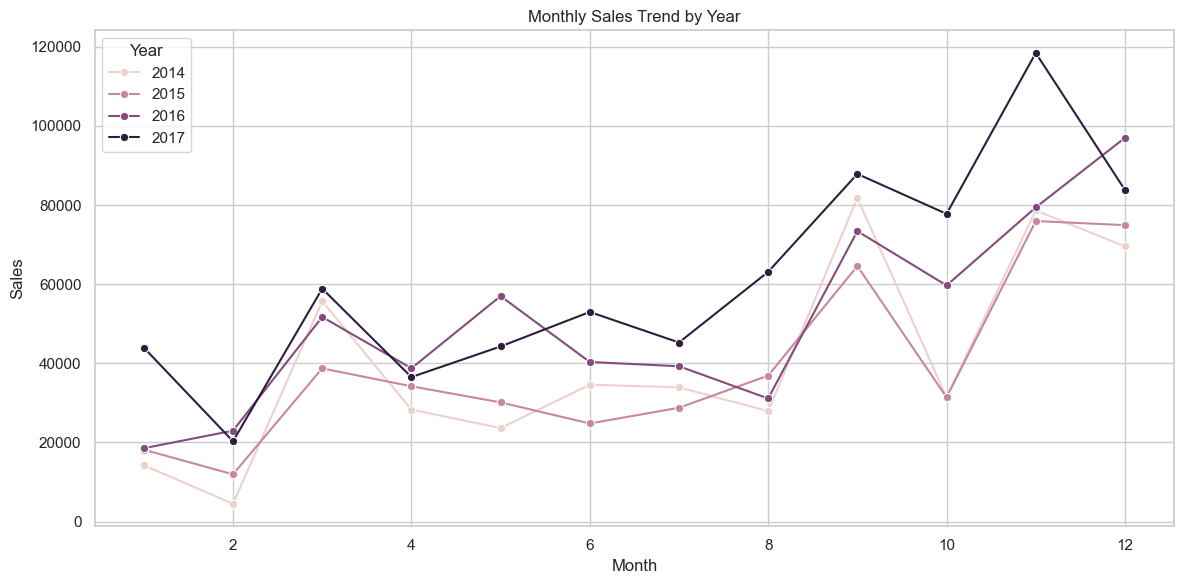

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.tight_layout()
plt.show()


In [62]:
# 12. Peak sales months
monthly_peak = monthly_trend.sort_values(by='Sales', ascending=False).head(10)
print("12. Peak Sales Months")
monthly_peak

12. Peak Sales Months


,Year,Month,Sales,Profit,Discount
46,2017,11,118447.8250,9690.1037,73.89
35,2016,12,96999.0430,17885.3093,47.67
44,2017,9,87866.6520,10991.5556,67.65
47,2017,12,83829.3188,8483.3468,67.72
8,2014,9,81777.3508,8328.0994,42.87
34,2016,11,79411.9658,4011.4075,58.32
10,2014,11,78628.7167,9292.1269,48.07
45,2017,10,77776.9232,9275.2755,51.92
22,2015,11,75972.5635,12474.7884,52.59
23,2015,12,74919.5212,8016.9659,43.37


In [63]:
# 13. Sub-category sales per unit
value_per_unit = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Quantity': 'sum'})
value_per_unit['Sales per Unit'] = value_per_unit['Sales'] / value_per_unit['Quantity']
value_per_unit = value_per_unit.reset_index()
print("13. Sub-Category Sales per Unit")
value_per_unit

13. Sub-Category Sales per Unit


,Sub-Category,Sales,Quantity,Sales per Unit
0,Accessories,167380.3180,2976,56.243386
1,Appliances,107532.1610,1729,62.193268
2,Art,27118.7920,3000,9.039597
3,Binders,203412.7330,5974,34.049671
4,Bookcases,114879.9963,868,132.350226
5,Chairs,328449.1030,2356,139.409636
6,Copiers,149528.0300,234,639.008675
7,Envelopes,16476.4020,906,18.185874
8,Fasteners,3024.2800,914,3.308840
9,Furnishings,91705.1640,3563,25.738188


In [68]:
# 14. Product combinations (market basket)
market_basket = df.groupby('Order ID')['Product Name'].apply(lambda x: list(x)).reset_index()
print("\n14. Sample Product Combinations")
market_basket.head()



14. Sample Product Combinations


,Order ID,Product Name
0,CA-2014-100006,[AT&T EL51110 DECT]
1,CA-2014-100090,"[Hon 2111 Invitation Series Corner Table, Wils..."
2,CA-2014-100293,[Xerox 1887]
3,CA-2014-100328,"[Pressboard Covers with Storage Hooks, 9 1/2"" ..."
4,CA-2014-100363,"[Binder Clips by OIC, Things To Do Today Spira..."
